<a href="https://colab.research.google.com/github/LinggarM/Health-Costs-Prediction-using-Deep-Neural-Network/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-04-03 19:25:08--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-04-03 19:25:09 (118 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_x = dataset[dataset.columns[:6]]
df_y = dataset['expenses']

In [5]:
from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()

sex_en = sex_encoder.fit_transform(df_x['sex'].tolist())
smoker_en = smoker_encoder.fit_transform(df_x['smoker'].tolist())
region_en = region_encoder.fit_transform(df_x['region'].tolist())

In [6]:
df_x['sex'] = sex_en
df_x['smoker'] = smoker_en
df_x['region'] = region_en

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [7]:
df_x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [8]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(df_x)
# x = scaler.transform(df_x)
# df_x_transformed = pd.DataFrame(x, columns = df_x.columns)
# df_x_transformed.head()

In [9]:
x = np.array(df_x)

In [10]:
len(x)

1338

In [11]:
y = df_y.tolist()

In [12]:
len(y)

1338

In [13]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [15]:
train_dataset[0].shape

(6,)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Normalization, Dense, Activation, Dropout

model = Sequential()
model.add(Input(train_dataset[0].shape))
model.add(Normalization(axis = 1))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = ['mae', 'mse']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                        

In [17]:
history = model.fit(
    train_dataset, train_labels,
    validation_data = [test_dataset, test_labels],
    epochs = 300
)

Epoch 1/300
34/34 [==============================] - 1s 8ms/step - loss: 314248672.0000 - mae: 13076.9893 - mse: 314248672.0000 - val_loss: 327962880.0000 - val_mae: 13040.4814 - val_mse: 327962880.0000
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 252516880.0000 - mae: 10622.0146 - mse: 252516880.0000 - val_loss: 169759920.0000 - val_mae: 7643.0435 - val_mse: 169759920.0000
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 135656176.0000 - mae: 9134.6260 - mse: 135656176.0000 - val_loss: 136848976.0000 - val_mae: 8721.3213 - val_mse: 136848976.0000
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 129139024.0000 - mae: 8955.1729 - mse: 129139024.0000 - val_loss: 134143848.0000 - val_mae: 9110.0098 - val_mse: 134143848.0000
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 127866928.0000 - mae: 8706.2920 - mse: 127866928.0000 - val_loss: 134008128.0000 - val_mae: 9709.3398 - val_mse: 1340081

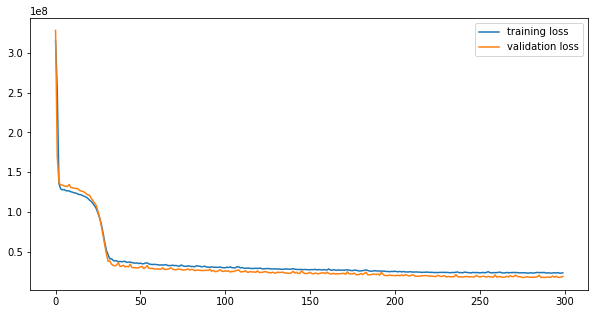

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])

In [19]:
model.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - loss: 19365312.0000 - mae: 3329.2505 - mse: 19365312.0000 - 23ms/epoch - 3ms/step


[19365312.0, 3329.25048828125, 19365312.0]

9/9 - 0s - loss: 19365312.0000 - mae: 3329.2505 - mse: 19365312.0000 - 23ms/epoch - 3ms/step
Testing set Mean Abs Error: 3329.25 expenses
You passed the challenge. Great job!


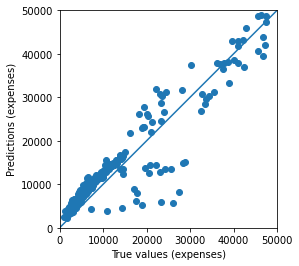

In [20]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
